In [1]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def estimate_average(b,col,delt=-1,rew=-1):
    data_lists = {}
    i = 0
    if delt==-1:
        with open('ExperimentRunner/src/ERgraphExperiments/beta'+str(b)+'/seir-experiment1.csv', 'rb') as f:
            reader = csv.reader(f)
            for row in reader:
                data_lists[i] = list(row)
                i=i+1
    else:
        with open('ExperimentRunner/src/ERgraphExperiments/beta'+str(b)+'/delta'+str(delt)+'/experiment'+str(rew)+'.csv', 'rb') as f:
            reader = csv.reader(f)
            for row in reader:
                data_lists[i] = list(row)
                i=i+1
            
    data = []
    average_data = 0
    for j in range(1,len(data_lists)):
        var = float(data_lists[j][col])
        average_data = average_data+var
        data.append(var)
    return average_data/len(data)


In [14]:
print estimate_average(0,13, 0,0)
print estimate_average(0,14,0,0)
print estimate_average(0,15,0,0)
print estimate_average(0,10)
print estimate_average(0,11)
print estimate_average(0,12)

658.718267027
1744.72
0.348944
390.145027143
1825.78
0.365156


In [32]:
import plotly.plotly as py
import plotly.graph_objs as go
deltas = [0.289,0.389,0.489,0.589]
rewires = [0.0,0.15,0.25,0.35]
color1 = ['rgba(204,204,204,1)']
x1 = [""]
y1 = [estimate_average(0,10)]
for delta in range(0,len(deltas)):
    for rewire in range(0, len(rewires)):
        x1.append("$\\delta="+str(deltas[delta])+",\\quad r\_degree="+str(rewires[rewire])+"$")
        y1.append(estimate_average(0,13, delta,rewire))
        color1.append('rgba(222,45,38,0.8)')

bar_data = go.Bar(
    x=x1,
    y=y1,
    marker=dict(
        color=color1,
    ),
)
data = [bar_data]
layout = go.Layout(
    title='Mean Outbreak Size',
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pandas/volts_histogram')
# plot_url = py.plot(fig, filename='color-bar')

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go
beta = 1
col1 = 12
col2 = 15
betas = [0.1151,0.2151,0.3151]
deltas = [0.289,0.389,0.489,0.589]
rewires = [0.0,0.15,0.25,0.35]
colors = ['rgba(51,0,255,1)', 'rgba(51,0,202,1)', 'rgba(51,0,150,1)', 'rgba(51,0,102,1)']
x1 = ["SEIR"]
data = []
y0= {}

for delta in range(0,len(deltas)):
    y1 = [estimate_average(beta,col1)]
    x1 = ["SEIR"]
    for rewire in range(0, len(rewires)):
        x1.append("SEIDR r_degree="+str(rewires[rewire]))
        y1.append(estimate_average(beta,col2, delta,rewire))
    y0[delta] = y1


for delta in range(0,len(deltas)):
    trace = go.Bar(
        x=x1,
        y=y0[delta],
        name='$\\delta='+str(deltas[delta])+"$",
        marker=dict(
            color=colors[delta], 
            line=dict(
                color='rgba(255,255,255,1)',
                width=2,
            )
        )
    )
    data.append(trace)
    
layout = go.Layout(
    barmode='group', 
    title='$Maximum\\quad Outbreak\\quad Proportion\\quad\\beta='+str(betas[beta])+"$",
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='MaxPropOS'+str(beta))
# plot_url = py.plot(fig, filename='color-bar')

PlotlyError: Request throttled. You've created/updated more charts than your allowed limit of 50/day. You may either wait one day or upgrade your account. Visit https://plot.ly/settings/subscription/ to upgrade.

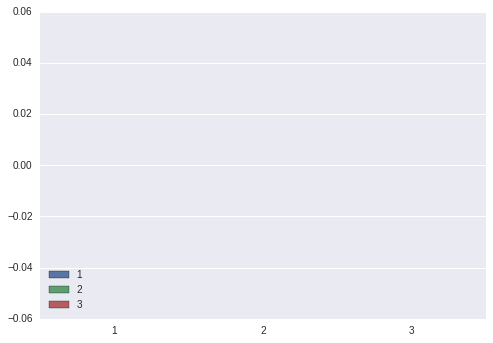

In [28]:
import seaborn as sns
data = {}
data['day'] = [1,2,3]
data['total_bill'] = [4,5,60]
data['sex'] = ['female', 'male']
ax = sns.barplot(x=[1,2,3], y=[4,5,6], hue={1:[10,1,1],2:[0,50,0], 3:[1,1,1]})